In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np 
from keras.callbacks import EarlyStopping, ModelCheckpoint

print('Python version : ', sys.version)
print('Keras version : ', keras.__version__)

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 250
filename='checkpoint.h5'.format(epochs,batch_size)
early_stopping=EarlyStopping(monitor='val_loss',mode='min',patience=15,verbose=1)                           #얼리스타핑
checkpoint=ModelCheckpoint(filename,monitor='val_loss',verbose=1,save_best_only=True,mode='auto')           #체크포인트

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#1
model.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#2
model.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
#3
model.add(Conv2D(64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
#4
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
'''
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',  score[0])
print('Test accuracy:', score[1])
model.save('MNIST_CNN_model.h5')
'''

Python version :  3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Keras version :  2.3.1
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_7 (Max

"\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\nhistory = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))\n\nscore = model.evaluate(x_test, y_test, verbose=0)\nprint('Test loss:',  score[0])\nprint('Test accuracy:', score[1])\nmodel.save('MNIST_CNN_model.h5')\n"

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator              #이미지증강
image_generator=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)
augment_size=20000

randidx=np.random.randint(x_train.shape[0],size=augment_size)
x_augmented=x_train[randidx].copy()
y_augmented=y_train[randidx].copy()
x_augmented=image_generator.flow(x_augmented,np.zeros(augment_size),
                                 batch_size=augment_size,shuffle=False).next()[0]

#데이터에 추가
x_train=np.concatenate((x_train,x_augmented))
y_train=np.concatenate((y_train,y_augmented))
print(x_train.shape)

(80000, 28, 28, 1)


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test),callbacks=[checkpoint,early_stopping]) #학습

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',  score[0])
print('Test accuracy:', score[1])
model.save('MNIST_CNN_model.h5')

Train on 80000 samples, validate on 10000 samples
Epoch 1/250
80000/80000 [==============================] - 24s 301us/step - loss: 0.5569 - accuracy: 0.8087 - val_loss: 0.3307 - val_accuracy: 0.8826

Epoch 00001: val_loss improved from inf to 0.33073, saving model to checkpoint.h5
Epoch 2/250
80000/80000 [==============================] - 23s 292us/step - loss: 0.3549 - accuracy: 0.8691 - val_loss: 0.2959 - val_accuracy: 0.8912

Epoch 00002: val_loss improved from 0.33073 to 0.29594, saving model to checkpoint.h5
Epoch 3/250
80000/80000 [==============================] - 23s 291us/step - loss: 0.3083 - accuracy: 0.8859 - val_loss: 0.2524 - val_accuracy: 0.9083

Epoch 00003: val_loss improved from 0.29594 to 0.25244, saving model to checkpoint.h5
Epoch 4/250
80000/80000 [==============================] - 23s 291us/step - loss: 0.2855 - accuracy: 0.8945 - val_loss: 0.2312 - val_accuracy: 0.9153

Epoch 00004: val_loss improved from 0.25244 to 0.23123, saving model to checkpoint.h5
Epoch 

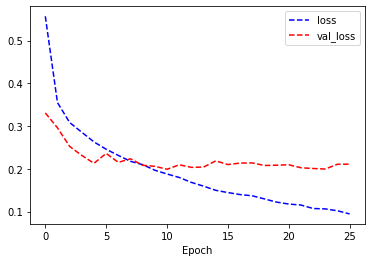

In [14]:
#loss동향 시각화--------------------------------------------------------------
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

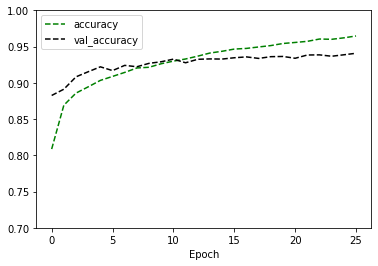

In [15]:
#acc
plt.plot(history.history['accuracy'],'g--',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

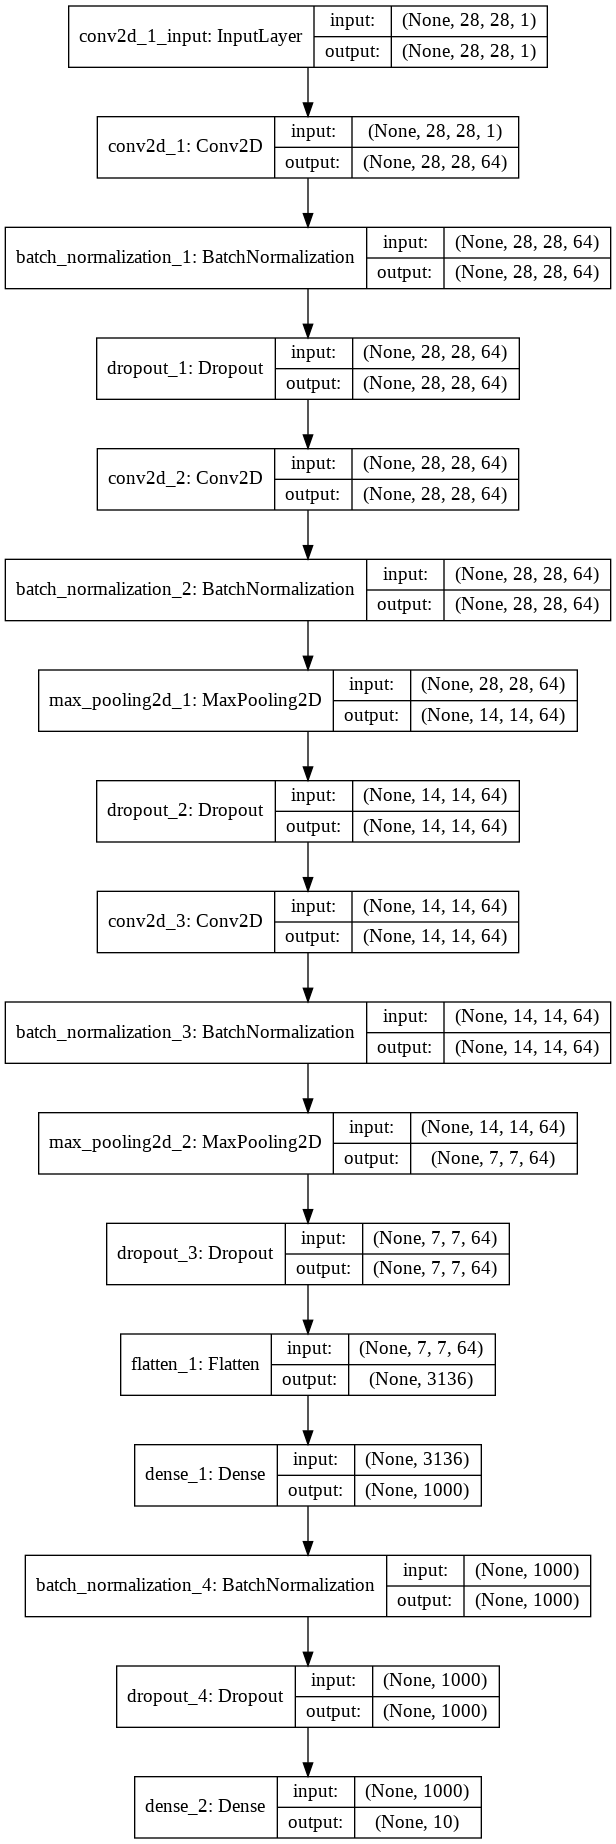

In [ ]:
keras.utils.plot_model(model,'model.png',show_shapes=True)